In [1]:
import gym
import numpy as np
import pandas

import gym_map_bro
import toy_agents

env = gym.make('map-bro-v0')
env.__myinit__()

np.random.seed(0)

# Variable initialization for manual looping
loop = 0

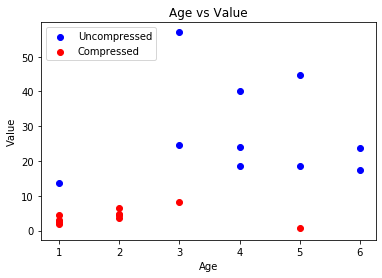

Uncompressed Database:
                  uid              src  sport              dst  age      value
0   CTySHd36MODzjqHEh   192.168.202.76    137  192.168.202.255  3.0  24.554041
1  C4SrUv2XNVcWGxMKA4  192.168.202.100  45658   192.168.27.202  6.0  23.632553
2   CTySHd36MODzjqHEh   192.168.202.76    137  192.168.202.255  6.0  17.372072
3   CTySHd36MODzjqHEh   192.168.202.76    137  192.168.202.255  3.0  57.009206
4   CTySHd36MODzjqHEh   192.168.202.76    137  192.168.202.255  4.0  18.576388
5   CTySHd36MODzjqHEh   192.168.202.76    137  192.168.202.255  1.0  13.623691
6   CTySHd36MODzjqHEh   192.168.202.76    137  192.168.202.255  5.0  44.865382
7   CTySHd36MODzjqHEh   192.168.202.76    137  192.168.202.255  4.0  40.119172
8   CTySHd36MODzjqHEh   192.168.202.76    137  192.168.202.255  5.0  18.642922
9   CghXHv4P9sybq1dnL  192.168.202.100  45658   192.168.27.203  4.0  24.057502
Compressed Database:
                  uid              src  sport              dst  age     value
0   CghXH

0

In [7]:
# This cell can be run repeatedly to import new batches from a bro file

# New batch of 5 lines, here represented by 5 random values
batch = pandas.read_csv("dns.log", header=loop)
values = np.random.exponential([10.0, 10.0, 10.0, 10.0, 10.0])
loop += 5

toy_agents.batch_load(env, batch, values)
env.render()